# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








**Start The Project**

# **Task 0:- Installing Libraries**

#### **RUN THIS FIRST!**



In [ ]:
# Installing neccessary libraries
import subprocess
import sys

lib_list = ['bs4', 'selenium', 'chromium-chromedriver']
for libs in lib_list:
  subprocess.call([sys.executable, '-m', 'pip', 'install', libs])
  print(f"{libs} installed!")

bs4 installed!
selenium installed!
chromium-chromedriver installed!


In [ ]:
#import all necessary labraries
import re
import time
import requests
import numpy as np
import pandas as pd
import datetime
import selenium
from bs4 import BeautifulSoup
from selenium import webdriver
from google.colab import drive
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from selenium.webdriver.common.by import By
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

# **Task 1:- Web Scrapping**

## **Scrapping Movies Data**


#### **selenium_setup():**
is a utility function designed to set up a headless Chrome WebDriver using the Selenium library.

In [ ]:
def selenium_setup():
  options = webdriver.ChromeOptions()
  options.add_argument('--headless')
  options.add_argument('--no-sandbox')
  options.add_argument('--disable-dev-shm-usage')
  driver = webdriver.Chrome(options=options)
  return driver

#### **create_DataFrame():**
serves the purpose of initializing an empty DataFrame with pre-defined column names. The specific columns of the DataFrame is intended to store information related to movies or TV shows as the infomation format for both is simmillar.

In [ ]:
def create_DataFrame():
  df = pd.DataFrame(columns=['Title',
                              'Release_year',
                              'Type',
                              'Streaming_platform',
                              'IMDB_ratings',
                              'Total_reviews',
                              'Genre',
                              'Runtime/Duration(mins)',
                              'Age_rating',
                              'Production_country',
                              'url']
                    )
  return df

#### **get_title():**
The function extracts the text content of the \<h1> tag within the <body> of the HTML represented by the BeautifulSoup object (soup). The extracted title is stripped of leading and trailing whitespaces. The function then updates the 'Title' key in the provided dictionary (_dict) with the extracted title.


In [ ]:
def get_title(soup, _dict):
  try:
    _dict['Title'] = soup.body.h1.text.strip()
  except Exception as e:
    print(e)
  return _dict

#### **get_year():**
The function uses soup.find() to locate a <span> element with the class 'text-muted' within the HTML structure. It then
retrieves the text content of that <span> element. The regular expression re.match(r'\((.*?)\)', ...), is used to extra-
-ct the content within parentheses, which is assumed to represent the release year.

In [ ]:
# Write Your Code here
def get_year(soup, _dict):
  try:
    _dict['Release_year'] = re.match(r'\((.*?)\)', soup.find('span', class_='text-muted').text.strip()).group(1)
  except Exception:
    pass
  return _dict

#### **get_genre**
The function uses a regular expression (genre_regex) to match a specific pattern within the HTML structure. This pattern appears to be related to genre information and is expected to be found within a div with certain class attributes. If the regular expression finds a match within the HTML content represented by main_tag[ele], it extracts the genre information using genre_regex.match(...).group(1). The genre information is then cleaned using re.sub to replace occurrences of '&amp;' with 'and'.


In [ ]:
# Write Your Code here
def get_genre(main_tag, ele, _dict):
  genre_regex = re.compile(r'<div class="detail-infos"><h3 class="detail-infos__subheading">Genres</h3><div class="detail-infos__value">(.*?)</div></div>')
  if genre_regex.search(str(main_tag[ele])):
      genre_ = genre_regex.match(str(main_tag[ele])).group(1)
      _dict['Genre'] = re.sub(r'&amp;', 'and', genre_)
  return _dict

#### **get_runtime():**
The function uses two regular expressions (runtime_regex1 and runtime_regex2) to match two possible patterns within the HTML structure related to runtime information. These patterns are expected to be found within a div with certain class attributes. If runtime_regex1 finds a match within the HTML content represented by main_tag[ele], it extracts the hours and minutes separately and calculates the total duration in minutes. If runtime_regex2 finds a match, it extracts the duration in minutes directly.



In [ ]:
# Write Your Code here
def get_runtime(main_tag, ele, _dict):
  runtime_regex1 = re.compile(
      r'<div class="detail-infos"><h3 class="detail-infos__subheading">Runtime</h3><div class="detail-infos__value">(.*?)h (.*?)min</div></div>')
  runtime_regex2 = re.compile(
      r'<div class="detail-infos"><h3 class="detail-infos__subheading">Runtime</h3><div class="detail-infos__value">(.*?)min</div></div>')
  if runtime_regex1.search(str(main_tag[ele])):
      _dict['Runtime/Duration(mins)'] = 60 * int(runtime_regex1.match(str(main_tag[ele])).group(1)) + int(
          runtime_regex1.match(str(main_tag[ele])).group(2))
  elif runtime_regex2.search(str(main_tag[ele])):
      _dict['Runtime/Duration(mins)'] = int(runtime_regex2.match(str(main_tag[ele])).group(1))
  return _dict

#### **get_IMDb_rating():**
The function uses a regular expression (imdb_regex) to match a specific pattern within the HTML structure related to IMDb rating and total reviews information. This pattern is expected to be found within a span element with certain attributes. If the regular expression finds a match within the HTML content represented by main_tag[ele], it extracts the IMDb rating and total reviews separately.


In [ ]:
# Write Your Code here
def get_IMDb_rating(main_tag, ele, _dict):
  imdb_regex = re.compile(r'tooltip="IMDB"/><span>\s(.*?)\s\((.*?)\)\s</span>')
  if imdb_regex.search(str(main_tag[ele])):
      _dict['IMDB_ratings'] = imdb_regex.search(str(main_tag[ele])).group(1).strip()
      _dict['Total_reviews'] = imdb_regex.search(str(main_tag[ele])).group(2).strip()
  return _dict

#### **get_age():**
The function uses a regular expression (age_regex) to match a specific pattern within the HTML structure related to age rating information. This pattern is expected to be found within a div with certain class attributes. If the regular expression finds a match within the HTML content represented by main_tag[ele], it extracts the age rating information using age_regex.match(...).group(1).


In [ ]:
# Write Your Code here
def get_age(main_tag, ele, _dict):
  age_regex = re.compile(
      r'<div class="detail-infos"><h3 class="detail-infos__subheading">Age rating</h3><div class="detail-infos__value">(.*?)</div></div>')
  if age_regex.search(str(main_tag[ele])):
      _dict['Age_rating'] = age_regex.match(str(main_tag[ele])).group(1)
  return _dict

#### **get_country():**
The function uses a regular expression (prod_regex) to match a specific pattern within the HTML structure related to production country information. This pattern is expected to be found within a div with certain class attributes. If the regular expression finds a match within the HTML content represented by main_tag[ele], it extracts the production country information using prod_regex.match(...).group(1).

In [ ]:
# Write Your Code here
def get_country(main_tag, ele, _dict):
  prod_regex = re.compile(
      r'<div class="detail-infos"><h3 class="detail-infos__subheading" style="max-width: fit-content"> Production country </h3><div class="detail-infos__value">(.*?)</div></div>')
  if prod_regex.search(str(main_tag[ele])):
      _dict['Production_country'] = prod_regex.match(str(main_tag[ele])).group(1)
  return _dict

#### **get_streams():**
Finds the HTML element containing streaming service information using soup.find("div", class_="buybox-row stream"). Uses a try and except block to handle cases where there are no streaming services available (to catch exceptions). Iterates over the found links inside the stream_services element using for ele in range(len(stream_services.find_all('a'))). Checks if a specific pattern related to streaming services (using a regular expression with re.compile) is present within the HTML content of the link. If the pattern is found, extracts the streaming service name and appends it to the stream_list.



In [ ]:
def get_streams(soup, _dict):
  stream_list = []
  stream_services = soup.find("div", class_="buybox-row stream")
  # Try and except to catch movies with no streaming services available
  try:
      for ele in range(len(stream_services.find_all('a'))):
          if re.compile(r'<img alt="(.*?)"').search(str(stream_services.find_all('a')[ele])):
              stream_list.append(
                  re.compile(r'<img alt="(.*?)"').search(str(stream_services.find_all('a')[ele])).group(1).strip())
  except Exception:
      return None
  _dict['Streaming_platform'] = ', '.join(stream_list)
  return _dict

#### **get_MovieSeries_details():**
Sends an HTTP GET request to the provided URL using requests.get(url). Parses the HTML content of the page using BeautifulSoup with the 'html.parser'. Calls the above functions to extract specific details:


In [ ]:
def get_MovieSeries_details(url, _dict):
  '''
  Network connections are lossy, congested and servers fail. Below is a HTTP re-
  -sponse codes to retry on. We likely want to retry on the common server errors
  (500, 502, 503, 504) because servers and reverse proxies don't always adhere
  to the HTTP spec.

  Note: Always retry on 429 rate limit exceeded because the urllib library shou-
  -ld by default incrementally backoff on failed requests.
  '''
  # a bit of brute force is required as responses to most pages is 429
  retry_strategy = Retry(total = 3,
                         backoff_factor = 1,
                         status_forcelist = [429, 500, 502, 503, 504],
                         allowed_methods = ["HEAD", "GET", "OPTIONS"]
                         )
  adapter = HTTPAdapter(max_retries = retry_strategy)
  # Creating a request session
  http = requests.Session()
  http.mount("https://", adapter)
  http.mount("http://", adapter)
  # Sending an HTTP GET request to the URL
  page = http.get(url)
  time.sleep(0.5)
  print(f"{url} response: {page.status_code}")
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup = BeautifulSoup(page.text, 'html.parser')
  # Extracts the title of the movie or series.
  get_title(soup, _dict)
  # Extracts the release year.
  get_year(soup, _dict)
  # Extracts streaming platform information.
  get_streams(soup, _dict)
  # Getting all the element of the info panel and iterating over each element to get desired data
  elements_ = soup.find_all('div', class_="detail-infos")
  for ele in range(len(elements_) // 2):
      # Extracts genre information.
      get_genre(elements_, ele, _dict)
      # Extracts IMDb rating and total reviews information.
      get_IMDb_rating(elements_, ele, _dict)
      # Extracts age rating information
      get_age(elements_, ele, _dict)
      # Extracts production country information.
      get_country(elements_, ele, _dict)
      # Extracts runtime information.
      get_runtime(elements_, ele, _dict)
  # return updated df
  return _dict

#### **get_Movies_():**
aim at scraping information about movies from a given URL and appending the details to a DataFrame.



In [ ]:
def get_Movies_(url, df, driver):
  # driver = selenium_setup()
  driver.get(url)
  print(driver.current_url)
  # HTTP request
  page = requests.get(driver.current_url)
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup = BeautifulSoup(page.text, 'html.parser')
  try:
  # Iterates over all the links (<a> tags with an href attribute) within a specific div with class "title-list-grid."
    for ele in soup.find("div", {"class": "title-list-grid"}).find_all("a", href=True):
        # For each movie link, constructs the full movie URL by appending the href to the base URL ("https://www.justwatch.com")
        movie_url = "https://www.justwatch.com" + ele['href']
        # Initializes a dictionary (movie_ele_dict) to store movie details with default values
        movie_ele_dict = {
            'Title': None,
            'Release_year': None,
            'Type': "movie",                                                                           # Note for movies
            'Streaming_platform': None,
            'IMDB_ratings': None,
            'Total_reviews': None,
            'Genre': None,
            'Runtime/Duration(mins)': None,
            'Age_rating': None,
            'Production_country': None,
            'url': movie_url
        }
        # Calls the get_MovieSeries_details function to extract details for the current movie URL and updates the dictionary
        # Appends the dictionary as a new row to the provided DataFrame (df)
        df.loc[len(df)] = get_MovieSeries_details(movie_url, movie_ele_dict)
        print(f"{movie_url} extracted!")
  except Exception as e:
    print(e)
  # driver.close()
  # Returns the updated DataFrame
  return df

#### **get_Series_():**
is designed to collect information about TV series from a given URL and append the details to a DataFrame.


In [ ]:
def get_Series_(url, df, driver):
  try:
    driver.get(url)
    print(driver.current_url)
    # HTTP request
    page = requests.get(driver.current_url)
    # Parsing the HTML content using BeautifulSoup with the 'html.parser'
    soup = BeautifulSoup(page.text, 'html.parser')
    # Interating over all the links in the grid to send request to every single link
    # and getting their details
    for ele in soup.find("div", {"class": "title-list-grid"}).find_all("a", href=True):
        series_url = "https://www.justwatch.com" + ele['href']
        series_ele_list = {
            'Title': None,
            'Release_year': None,
            'Type': "series",                                                                          # Note for series
            'Streaming_platform': None,
            'IMDB_ratings': None,
            'Total_reviews': None,
            'Genre': None,
            'Runtime/Duration(mins)': None,
            'Age_rating': None,
            'Production_country': None,
            'url': series_url
        }
        # Calls the get_MovieSeries_details function to extract details for the current TV series URL and updates the dictionary
        # Appends the dictionary as a new row to the provided DataFrame (df)
        df.loc[len(df)] = get_MovieSeries_details(series_url, series_ele_list)
        print(f"{series_url} extracted!")
  except Exception as e:
    print(e)
  # Returns the updated DataFrame
  return df

### **The start_scraping():**
is the main function responsible for initiating the web scraping process to gather information about movies and TV shows.

In [ ]:
# Main function to get movies and film data
def start_scraping():
  '''
  Although using the selenium driver is adjunct here, as we can extract our data directly using the url.
  However, I have added it so if we want to say use the filter or sort buttons in the website, we can
  call the driver and navigate those components. Selenium Webdriver is not called in the project as
  it gave an error in collab regarding invalid session!

  Note: If you are using the driver, DO REMEMBER TO CLOSE IT as it consume a lot of memory!
  '''
  # Calls the _movies function to extract movie details and stores them in a DataFrame (df_movies_).
  def _movies():
      print("Extracting movies...")
      driver = selenium_setup()
      df_movies_ = create_DataFrame()
      url_movies = 'https://www.justwatch.com/in/movies?release_year_from=2023&release_year_until=2023'
      for i in range(0, 5):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        # Wait to load page
        time.sleep(0.5)
      # Extracting Top 100 movies
      get_Movies_(url_movies, df_movies_, driver)
      driver.close()
      print("Movies extracted!")
      return df_movies_
  # Calls the _series function to extract TV show details and stores them in another DataFrame (df_series_).
  def _series():
      print("Extracting tv-shows...")
      driver = selenium_setup()
      df_series_ = create_DataFrame()
      url_series = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'
      for i in range(0, 5):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        # Wait to load page
        time.sleep(0.5)
      # Extracting Top 100 series
      get_Series_(url_series, df_series_, driver)
      driver.close()
      print("Tv-shows extracted!")
      return df_series_
  # Concatenates the movie and TV show DataFrames into a single DataFrame (combined).
  combined = pd.concat([_movies(), _series()], ignore_index=True)
  # Returns the combined DataFrame containing information about both movies and TV shows.
  return combined

In [ ]:
x = start_scraping()

Extracting movies...
https://www.justwatch.com/in/movies?release_year_from=2023&release_year_until=2023
https://www.justwatch.com/in/movie/oppenheimer response: 200
https://www.justwatch.com/in/movie/oppenheimer extracted!
https://www.justwatch.com/in/movie/animal-2022 response: 200
https://www.justwatch.com/in/movie/animal-2022 extracted!
https://www.justwatch.com/in/movie/salaar response: 200
https://www.justwatch.com/in/movie/salaar extracted!
https://www.justwatch.com/in/movie/dunki response: 200
https://www.justwatch.com/in/movie/dunki extracted!
https://www.justwatch.com/in/movie/12th-fail response: 200
https://www.justwatch.com/in/movie/12th-fail extracted!
https://www.justwatch.com/in/movie/poor-things response: 200
https://www.justwatch.com/in/movie/poor-things extracted!
https://www.justwatch.com/in/movie/the-kerala-story response: 200
https://www.justwatch.com/in/movie/the-kerala-story extracted!
https://www.justwatch.com/in/movie/anyone-but-you response: 200
https://www.jus

In [ ]:
x

,Title,Release_year,Type,Streaming_platform,IMDB_ratings,Total_reviews,Genre,Runtime/Duration(mins),Age_rating,Production_country,url
0,Oppenheimer (2023),2023,movie,Jio Cinema,8.4,676k,"History, Drama",180,UA,"United Kingdom, United States",https://www.justwatch.com/in/movie/oppenheimer
1,Animal (2023),2023,movie,Netflix,6.3,84k,"Action and Adventure, Crime, Drama, Mystery an...",201,A,India,https://www.justwatch.com/in/movie/animal-2022
2,Salaar (2023),2023,movie,Netflix,6.5,61k,"Action and Adventure, Crime, Drama, Mystery an...",175,A,India,https://www.justwatch.com/in/movie/salaar
3,Dunki (2023),2023,movie,Netflix,6.7,70k,"Comedy, Drama",160,None,India,https://www.justwatch.com/in/movie/dunki
4,12th Fail (2023),2023,movie,Hotstar,9.0,104k,"Drama, History",147,None,India,https://www.justwatch.com/in/movie/12th-fail
...,...,...,...,...,...,...,...,...,...,...,...
195,Marry My Husband (2024),2024,series,Amazon Prime Video,7.9,3k,"Fantasy, Romance, Comedy, Drama, Science-Fiction",63,None,South Korea,https://www.justwatch.com/in/tv-show/marry-my-...
196,The Night Manager (2016),2016,series,Hotstar,8.0,102k,"Mystery and Thriller, Crime, Drama, Made in Eu...",60,A,United Kingdom,https://www.justwatch.com/in/tv-show/the-night...
197,Dehati Ladke (2023),2023,series,Amazon miniTV,None,None,Drama,24,None,India,https://www.justwatch.com/in/tv-show/dehati-ladke
198,From (2022),2022,series,None,None,None,"Science-Fiction, Mystery and Thriller, Drama, ...",50,None,United States,https://www.justwatch.com/in/tv-show/from


# **Task 2 :- Data Filtering & Analysis**

### **Data Filtering**

#### **filter_data():**
filter a DataFrame containing information about movies and TV shows based on certain criteria:

- The filtering criteria include movies and TV shows released in the last 2 years,
- and with an IMDb rating greater than 7.0


In [ ]:
# Write Your Code here
def filter_data(df_origin):
  df = df_origin.copy(deep=True)
  # Only include movies and TV shows released in the last 2 years (from the current date).
  # The lambda function get_year is used to dynamically calculate the year two years ago from the current date.
  get_year = lambda: (datetime.now() - timedelta(days=365 * 2)).strftime("%Y")
  year_ = get_year()
  # Only include movies and TV shows released with the last 2 years
  df = df[df['Release_year'] > year_]
  # Converts the 'IMDB_ratings' column to float type to enable numerical comparison.
  df['IMDB_ratings'] = df.loc[:, ('IMDB_ratings')].astype(float)
  # Only include movies and TV shows with an IMDb rating of 7 or higher.
  df = df[df['IMDB_ratings'] > 7.0]
  # Resets the index of the DataFrame and drops the old index.
  df.reset_index(inplace=True, drop=True)
  # return df
  return df

### **Data Analysis:**

#### **get_info():**
provide summary information about a DataFrame containing details about movies and TV shows.


In [ ]:
# Write Your Code here
def get_info(df):
  # The total number of rows (elements) in the DataFrame
  print(f'Total elements(rows): {df.shape[0]}')
  # The total number of columns (attributes) in the DataFrame.
  print(f'Total attributes(columns): {df.shape[1]}')
  # The number of duplicated rows in the DataFrame.
  print(f'Duplicated items: {df.duplicated().sum()}')
  # The number of null values in the 'IMDB_ratings' column.
  print(f'IMDB ratings null items: {df.IMDB_ratings.isna().sum()}')
  # The number of null values in the 'Genre' column.
  print(f'Genre null items: {df.Genre.isna().sum()}')
  # The number of null values in the 'Streaming_platform' column, with a note indicating that these represent shows
  # and movies that cannot be watched on an OTT (Over-The-Top) platform.
  print(f'Streaming_platform null items: {df.Streaming_platform.isna().sum()} (shows and movie that cannot be watched in an OTT)\n')

#### **data_analysis():**
perform some basic data analysis on a DataFrame containing information about movies and TV shows.


In [ ]:
def data_analysis(df, is_origin=True):
  if is_origin:
    df['IMDB_ratings'] = df.loc[:, ('IMDB_ratings')].astype(float)
  df_type_ = df.groupby(['Type'])
  # The total number of TV series in the DataFrame.
  print(f"Total number of tv-series in the dataframe: {len(df_type_.get_group('series'))}")
  # The total number of movies in the DataFrame.
  print(f"Total number of movies in the dataframe: {len(df_type_.get_group('movie'))}")
  # The average IMDb rating for movies in the DataFrame.
  print(f"Average IMDb rating for the movies: {float(df_type_.get_group('movie').agg({'IMDB_ratings': 'mean'})):.2f}")
  # The average IMDb rating for TV shows in the DataFrame.
  print(f"Average IMDb rating for the TV shows: {float(df_type_.get_group('series').agg({'IMDB_ratings': 'mean'})):.2f}")

#### **get_top_genres():**
analyze the 'Genre' column in the filtered or original DataFrame containing information about movies and TV shows to identify and visualize the top genres.



In [ ]:
#  Identify the top 5 genres that have the highest number of available movies and TV shows.
def get_top_genres(df, is_origin=True):
  # Initializes an empty dictionary (genre_dict) to store genre counts.
  genre_dict = dict()
  # Iterates through each element in the 'Genre' column of the DataFrame
  for ele in df.Genre:
      # Splits the genres into a list using commas as separators.
      my_list = ele.split(',')
      for sub_ele in my_list:
          # If the genre is already in the dict
          if sub_ele.strip() in genre_dict:
              # Increments the count for each genre in the genre_dict.
              genre_dict[sub_ele.strip()] += 1
          # If the genre not in already in the dict
          else:
              # Add first occurance in the dict
              genre_dict[sub_ele.strip()] = 1
  # Sorts the genre_dict based on genre counts in descending order.
  sorted_dict = dict(sorted(genre_dict.items(), key=lambda item: item[1], reverse=True))
  print("\nTop Genres: ")
  print(sorted_dict)
  # Creating a bar chart to better visualize the data
  labels = list(sorted_dict.keys())
  values = list(sorted_dict.values())

  # Plotting the pie chart
  plt.figure(figsize=(20, 4))
  plt.bar(labels, values, color='red')

  # Adding a title and labels
  if is_origin:
    plt.title('Top genres for Orginal Dataset')
  else:
    plt.title('Top genres for Filtered Dataset')
  plt.xlabel('genres')
  plt.xticks(rotation=45)
  plt.ylabel('available movies & tv-shows')

#### **get_top_stream():**
analyze the 'Streaming_platform' column in the filtered or original DataFrame containing information about movies and TV shows to identify and visualize the top genres.


In [ ]:
# Determine the streaming service with the most significant number of offerings.
def get_top_stream(df, is_origin=True):
  # Initializes an empty dictionary (stream_dict) to store streaming platform counts.
  stream_dict = dict()
  # Iterates through each element in the 'Streaming_platform' column of the DataFrame.
  for ele in df.Streaming_platform:
      # Skips iterations where the element is None.
      if ele == None:
          continue
      else:
          # Splits the streaming platforms into a list using commas as separators.
          my_list = ele.split(',')
          for sub_ele in my_list:
              # If the streaming platform is in already in the dict
              if sub_ele.strip() in stream_dict:
                  # Increments the count for each streaming platform in the stream_dict.
                  stream_dict[sub_ele.strip()] += 1
              # If the streaming platform not in already in the dict
              else:
                  stream_dict[sub_ele.strip()] = 1

  sorted_dict = dict(sorted(stream_dict.items(), key=lambda item: item[1], reverse=True))
  print("Top Streaming Platforms: ")
  print(sorted_dict)

  # Creating a bar chart to better visualize the data
  labels = list(sorted_dict.keys())
  values = list(sorted_dict.values())

  # Plotting the pie chart
  plt.figure(figsize=(20, 4))
  plt.bar(labels, values, color='cyan')

  # Adding a title and labels
  if is_origin:
    plt.title('Top streaming platforms for Orginal Dataset')
  else:
    plt.title('Top streaming platforms for Filtered Dataset')
  plt.xlabel('streaming platforms')
  plt.xticks(rotation=45)
  plt.ylabel('number of offerings')

### **start_filter_and_analysis():**
The start_filter_and_analysis function perform a series of filtering and analysis tasks on a DataFrame containing information about movies and TV shows.


In [ ]:
# Main function for data analysis!
def start_filter_and_analysis(df_original):
  # Calls the filter_data function to filter the original dataset to only include movies and TV shows released in the
  # last 2 years (from the current date) and with an IMDb rating of 7 or higher. The filtered DataFrame is stored in
  # df_fil.
  df_fil = filter_data(df_original)
  print("Filtered Dataset created")
  print("\nFor Original Dataset---------------------------->")
  # Calls the get_info function to print basic information about the original dataset, including the total number of
  # elements, attributes, duplicated items, IMDb ratings null items, genre null items, and streaming platform null it-
  # -ems.
  get_info(df_original)
  # Calls the data_analysis function to print an analysis of the original dataset, including the total number of movi-
  # -es and TV shows, and average IMDb ratings for movies and TV shows.
  data_analysis(df_original, is_origin=True)
  # Calls the get_top_genres function to visualize and print the top genres in the original dataset.
  get_top_genres(df_original, is_origin=True)
  # Calls the get_top_stream function to visualize and print the top streaming platforms in the original dataset.
  get_top_stream(df_original)
  print("\nFor Filtered Dataset---------------------------->")
  # Calls the get_info function to print basic information about the filtered dataset, including the total number of
  # elements, attributes, duplicated items, IMDb ratings null items, genre null items, and streaming platform null it-
  # -ems.
  get_info(df_fil)
  # Calls the data_analysis function to print an analysis of the filtered dataset, including the total number of movi-
  # -es and TV shows, and average IMDb ratings for movies and TV shows.
  data_analysis(df_fil, is_origin=False)
  # Calls the get_top_genres function to visualize and print the top genres in the filtered dataset.
  get_top_genres(df_fil, is_origin=False)
  # Calls the get_top_stream function to visualize and print the top streaming platforms in the filtered dataset.
  get_top_stream(df_fil)
  print("\n")
  # Returns the filtered DataFrame (df_fil).
  return df_fil

Filtered Dataset created

For Original Dataset---------------------------->
Total elements(rows): 200
Total attributes(columns): 11
Duplicated items: 0
IMDB ratings null items: 16
Genre null items: 0
Streaming_platform null items: 41 (shows and movie that cannot be watched in an OTT)

Total number of tv-series in the dataframe: 100
Total number of movies in the dataframe: 100
Average IMDb rating for the movies: 6.98
Average IMDb rating for the TV shows: 7.92

Top Genres: 
{'Drama': 148, 'Mystery and Thriller': 83, 'Action and Adventure': 77, 'Comedy': 55, 'Crime': 50, 'Science-Fiction': 39, 'Romance': 30, 'Fantasy': 28, 'Kids and Family': 19, 'History': 15, 'Horror': 15, 'Animation': 14, 'War and Military': 8, 'Sport': 3, 'Made in Europe': 3, 'Western': 2, 'Documentary': 2, 'Reality TV': 2}
Top Streaming Platforms: 
{'Netflix': 52, 'Amazon Prime Video': 44, 'Jio Cinema': 22, 'Hotstar': 15, 'Sony Liv': 8, 'Apple TV Plus': 7, 'aha': 6, 'Crunchyroll': 6, 'Lionsgate Play': 5, 'Lionsgate Pl

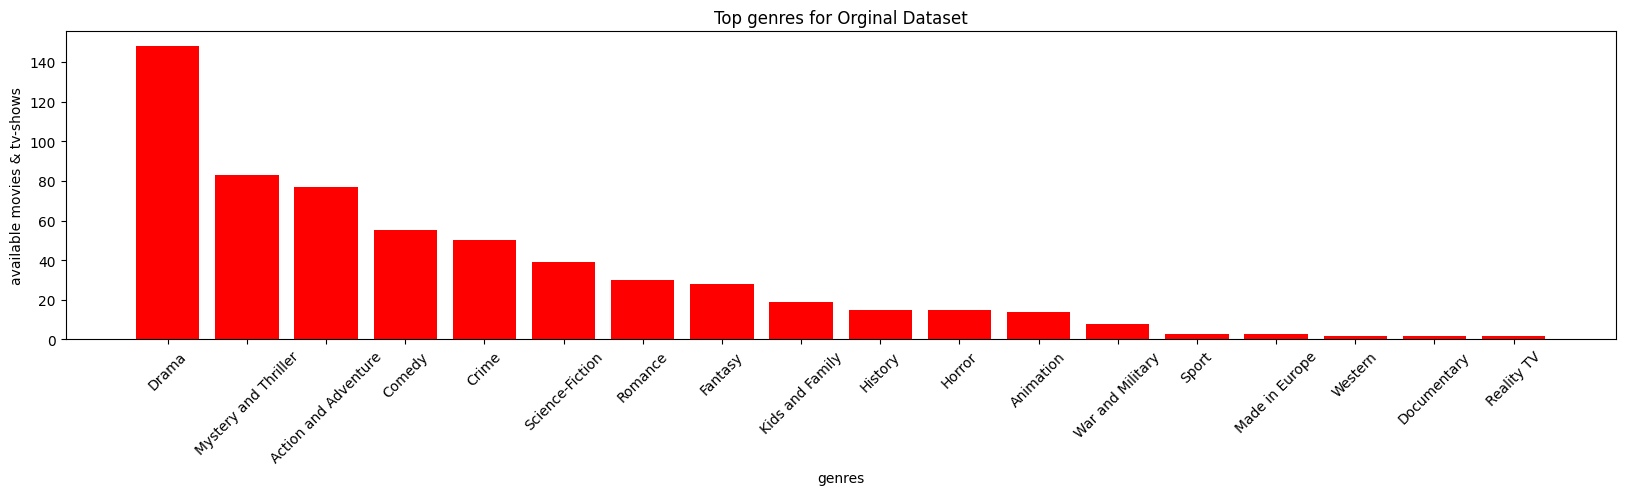

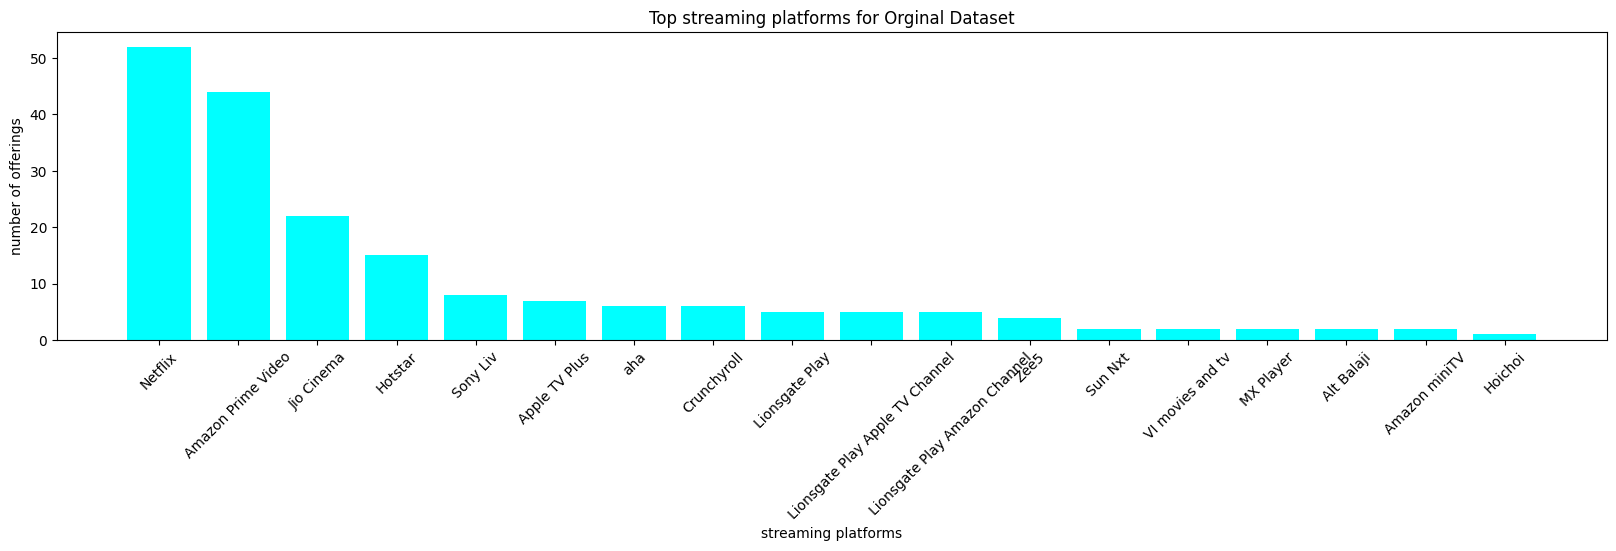

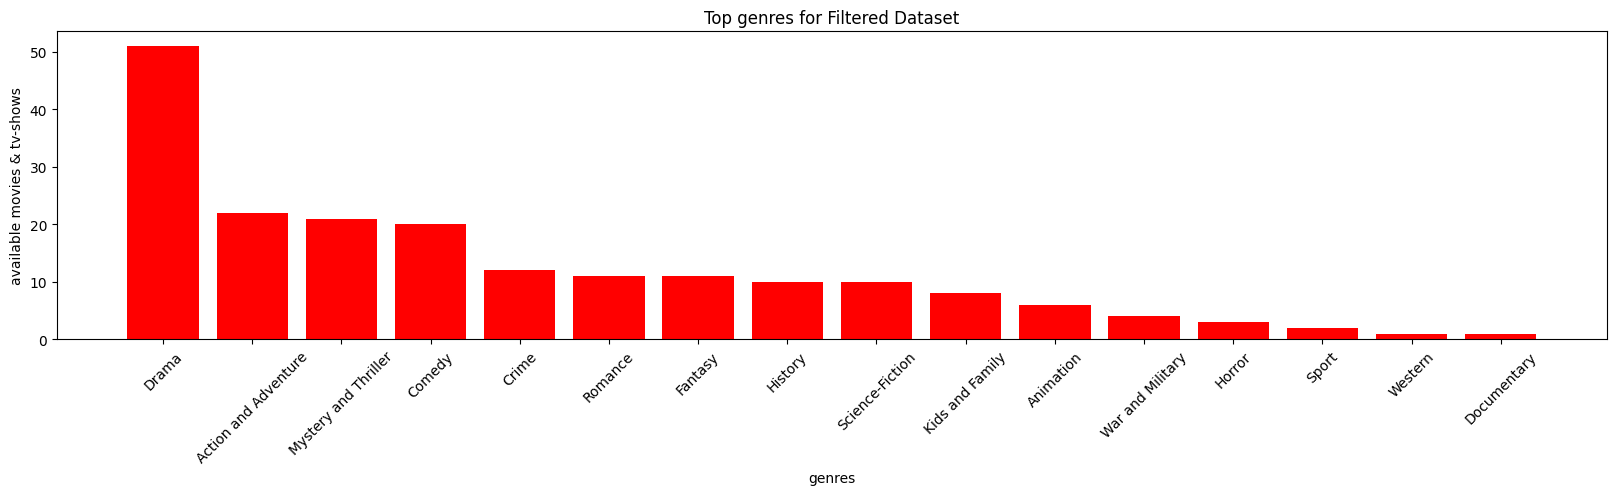

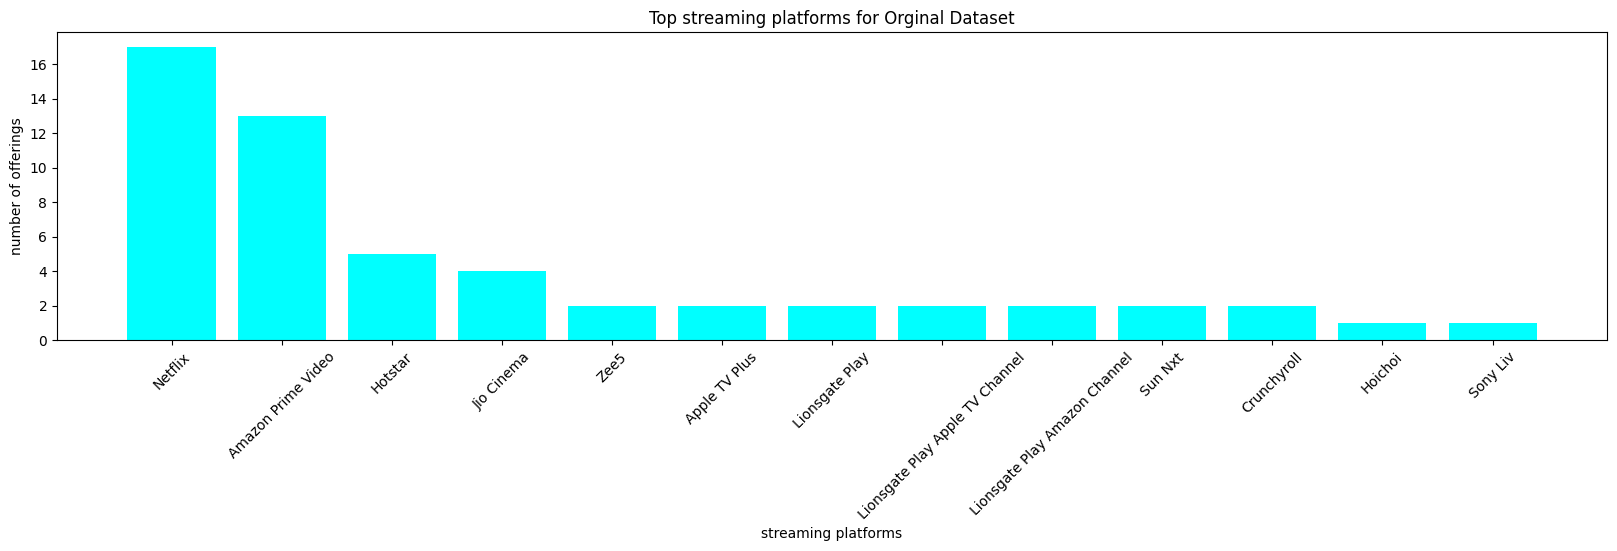

In [ ]:
x_filtered = start_filter_and_analysis(x)

# **Task 3 :- Data Export**

### **convert_to_csv():**
converts the dataframe into a .csv format

In [ ]:
#saving final dataframe as Final Data in csv format
def convert_to_csv(df, file_name):
  drive.mount('/content/drive')
  df.to_csv('/content/drive/My Drive/AlmaBetter/Projects/web_scraper_project/' + file_name, encoding='utf-8', index=False)
  print(f"DataFrame successfully converted and saved as {file_name}")

In [ ]:
# Saving the original DF
convert_to_csv(x, "justwatch_original103.csv")

# Saving the filtered DF
convert_to_csv(x_filtered, "justwatch_filtered103.csv")

Mounted at /content/drive
DataFrame successfully converted and saved as justwatch_original103.csv
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DataFrame successfully converted and saved as justwatch_filtered103.csv


# **Task 4 :- One Function to run them all!**

In [ ]:
# Main function to run the script
def main():
  print("JustWatch popular movie scraper started.....\n")
  time.sleep(1)
  df_original = start_scraping()
  print("\nOriginal Dataset created")
  df_filtered = start_filter_and_analysis(df_original)

  # Convert the original dataframe to csv format
  convert_to_csv(df_original, "justwatch_original101.csv")
  # Convert the filtered dataframe to csv format
  convert_to_csv(df_filtered, "justwatch_filtered101.csv")

main()

# **Dataset Drive Link (View Access with Anyone) -**

- Original Dataset: https://drive.google.com/file/d/1vESc0J5VEw3XzSBIfBwCsW-pSDIKzpkg/view?usp=sharing

- Filtered Dataset: https://drive.google.com/file/d/13vZtb8DVD85Zxd1uPb_efM3pWoC8JLww/view?usp=sharing

# ***Congratulations!!! You have completed your Assignment.***